Note: The following code snippet will ensure all of your program files will be stored on your own Google Drive. Use Ctrl+F9 when running your program to ensure that this is also executed each time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You may access the project [here](https://colab.research.google.com/drive/1xtmBoVjXJCmHPC9rSJfQyDVfZ-TUULK_?usp=sharing)



© 2024 Liew Choy Yein

---


#Project Title: Coursework Mark Calculator

The Coursework Mark Calculator is a program that helps CPT111 lecturers to compute the final marks and grades of their students. The program allows the user to upload a file with the raw marks for each assessment. The program also asks the user to enter the total coursework mark, the number of students, and the percentage of each assessment.

Then, the program calculates the weighted marks for each assessment based on the raw marks and the specified percentage. Next, the program calculates the final coursework mark for each student by adding up the weighted marks. It also calculates the mark over 100 and determines the final grade based on the mark over 100 and the grading scale. Finally, the program creates an output file that contains the raw marks and weighted marks for each assessment, the final coursework mark, the mark over 100 and the final grade for each student.

The program provide a good interface design and user-friendly prompts. This program aims to save time and effort for the lecturers and to make the grading process more accurate and reliable.

##Problem Analysis

##Input:



1.   Read data from file named containing the raw marks for each assessment
2.   Read total coursework marks, number of students , percentage for Test 1, Test 2, Assignment 1 and Assignment 2 from user input


##Process:

1.   Calculates the weighted marks for Test 1, Test 2, Assignment 1 and Assignment 2 based on the raw marks and the specified percentage.

```
weightage = raw marks * percentage / 100
```

2.   Calculates the final coursework mark for each student by summing up the weighted marks. Then, calculate mark over 100 based on final coursework marks and total coursework marks.



```
final coursework mark = Test1_Weightage + Test2_Weightage + Assignment1_Weightage + Assignment2_Weightage

over100 = final coursework mark / total coursework mark * 100
```


3.   Determines the final grade for each student based on the mark over 100 and grading schema.


##Output:


1.   A output file containing the raw marks and weighted marks for each assessments, the final coursework mark and the final grade for each student is created.


##Constraints:


1. The final coursework marks are always based on the total coursework mark input by the user and will not exceed it.
2. The weightage of each coursework in output file is always based on the percentage of courseworks, which is input by the user.
3. The number of students and the total coursework marks must be positive integers.
4. The number of students must not exceed the data (student matricNo) provided in the input file.
5. The raw marks in the input file (CPT111_CWMarks.txt) must be arranged in order.


#Programming Design & Solution
---
##Pseudocode

In [ ]:
%%writefile coursework.cpp
Main Module
START
    open inFile,outFile
	  read total coursework marks
	  while(total coursework marks<0)
		  read total coursework marks
	  end while

	  read numStudents
	  while (numStudents < 0)
		  read numStudents
	  end while

    read test1 percentage
    read test2 percentage
    read assignment1 percentage
    read assignment2 percentage

    if inFile cannot open
		  display "Input File cannot open"
	  if outFile cannot open
		  display "Output File cannot open"

    sumPercentageCW = test1 percentage + test2 percentage + assignment1 percentage + assignment2 percentage
    if(coursework_marks==sumPercentageCW)
      isSame = true
    else
      isSame = false
    end if

    CALL readFile(inFile, numStudents, matricNO, test1, test2, assignment1, assignment2)
    CALL calcWeightage(numStudents, test1, T1_Weightage, test1 percentage)
    CALL calcWeightage(numStudents, test2, T2_Weightage, test2 percentage)
    CALL calcWeightage(numStudents, assignment1, A1_Weightage, assignment1 percentage)
    CALL calcWeightage(numStudents, assignment2, A2_Weightage, assignment2 percentage)
    CALL calcTotalCW_Over100(totalCW, numStudents, T1_Weightage, T2_Weightage, A1_Weightage, A2_Weightage, over100, total coursework marks, grade,isSame,sumPercentageCW)
    CALL writeFile(outFile, numStudents, matricNO, test1, T1_Weightage, test2, T2_Weightage, assignment1, A1_Weightage, assignment2, A2_Weightage, totalCW, over100, grade)

    close inFile, outFile
END

Module readFile(fstream& inFile, int numStudents, int matricNO[], int test1[], int test2[], int assignment1[], int assignment2[])
    read first line
    for integer i = 0 to number-1
        inFile >> matricNO[i]>> test1[i]>> test2[i] >> assignment1[i] >> assignment2[i]
    end for
Return

Module calcWeightage(int numStudents, int marks[], double weightage[], int percent)
    read first line
    for integer i = 0 to number-1
        weightage[i] = marks[i] * percent / 100
    end for
Return

Module determine_grade(int numStudents,double over100[],char grade[])
    for integer i = 0 to number-1
        if(over100[i]>=80)
          grade[i]='A'
        else if(over100[i]>=70)
          grade[i]='B'
        else if(over100[i]>=60)
          grade[i]='C'
        else if(over100[i]>=50)
          grade[i]='D'
        else
          grade[i]='F'
    end for
Return

Module calcTotalCW_Over100(double *totalCW, int numStudents, double T1_Weightage[], double T2_Weightage[], double A1_Weightage[], double A2_Weightage[], double over100[], int CW_mark,char grade[])
    for integer i = 0 to number-1
        total = T1_Weightage[i] + T2_Weightage[i] + A1_Weightage[i] + A2_Weightage[i]
        if(!isSame)
          *(totalCW+i)=total/sumPercentageCW*CW_mark

        else
          *(totalCW + i) = total
        end if
        over100[i] = totalCW[i] / CW_mark * 100
        CALL determine_grade(numStudents, over100, grade)
    end for
Return

Module writeFile(fstream& outFile, int numStudents, int matricNo[], int test1[],double T1_Weightage[], int test2[],double T2_Weightage[],
               int assignment1[],double A1_Weightage[], int assignment2[], double A2_Weightage[], double total[], double over100[], char grade[])
    for integer i = 0 to number-1
        outFile << matricNo[i]<< test1[i] <<T1_Weightage[i]<< test2[i] << T2_Weightage[i] << assignment1[i] << A1_Weightage[i] <<assignment2[i] << A2_Weightage[i] << total[i] << over100[i] << grade[i]
    end for
    display "Output file (CPT111_CWResults.txt) is created"
Return


##Input file:

In [ ]:
%%writefile CPT111_CWMarks.txt
Matric Number,Test 1,Test 2,Assignment 1,Assignment 2
123456,78,80,85,90
123457,65,55,60,54
123458,55,55,60,65
123459,40,60,55,65
123460,36,55,78,80
123461,20,50,70,65
123462,27,45,60,70
123463,88,95,90,85
123464,75,85,74,80
123465,72,75,75,68
123466,68,86,88,74
123467,52,56,60,70
123468,45,62,75,64
123469,93,75,80,65
123470,77,89,80,75

Writing CPT111_CWMarks.txt


#Implementation of the program

In [ ]:
%%writefile coursework.cpp

// The program will read the input file with the raw marks, then perform the calculations,
// and create an output file containing all the marks in their weightage forms, final coursework marks and grades.

#include <fstream>
#include <iostream>
#include <string>
#include <iomanip>
using namespace std;

//function prototype
void readFile(fstream& ,int , int [], int [], int [], int [], int []);
void calcWeightage(int, int [], double [], int );
void calcTotalCW_Over100(double *, int , double [], double [], double [], double [], double [], int CW_mark,char [],char,int);
void determine_grade(int ,double [],char []);
void writeFile(fstream& , int, int [], int [],double [], int [],double [],int [],double [], int [], double [], double [], double [], char []);

int main() {
    //create inFile and outFile
    fstream inFile,outFile;
    inFile.open("CPT111_CWMarks.txt",ios::in);
    outFile.open("CPT111_CWResults.txt",ios::out);
    int coursework_marks, num ,test1_percentage, test2_percentage, assignment1_percentage, assignment2_percentage,sumPercentageCW;
    double total;
    bool isSame=true;

    cout<<setw(45)<<"Coursework Mark Calculator";
    cout<<"\n---------------------------------------------------------------------\n";
    cout<<"Enter Total Coursework Marks : ";
    cin>>coursework_marks;

    //check validation of coursework marks (user input)
    while(coursework_marks<=0){
      cout<<"Invalid input for coursework marks. Please enter a valid coursework marks. \n";
      cout<<"Enter Total Coursework Marks : ";
      cin>>coursework_marks;
    }

    cout<<"Enter number of student: ";
    cin>>num;

    //check validation of number of students (user input)
    while(num<=0){
      cout<<"Invalid input for number of student. Please enter a valid number of student. \n";
      cout<<"Enter number of student: ";
      cin>>num;
    }

    cout << "Enter Percentage for Test 1: ";
    cin >> test1_percentage;

    cout << "Enter Percentage for Test 2: ";
    cin >> test2_percentage;

    cout << "Enter Percentage for Assignment 1: ";
    cin >> assignment1_percentage;

    cout << "Enter Percentage for Assignment 2: ";
    cin >> assignment2_percentage;

    // declaration of array
    // size of array based on number of students
    int matricNO[num], test1[num], test2[num], assignment1[num], assignment2[num];
    double T1_Weightage[num], T2_Weightage[num], A1_Weightage[num], A2_Weightage[num], totalCW[num], over100[num];
    char grade[num];

    if(!inFile){
      cout<<"Input File cannot open.";
    }
    if(!outFile){
      cout<<"Output File cannot open.";
    }

    sumPercentageCW = test1_percentage + test2_percentage + assignment1_percentage + assignment2_percentage;
    //check whether sum of percentage of assessments equal to total coursework mark
    if(coursework_marks==sumPercentageCW){
      isSame=true;
    }
    else{
      isSame=false;
    }

    // call readFile function
    readFile(inFile, num, matricNO, test1, test2, assignment1, assignment2);

    // call function to calculate weightage for each coursework
    calcWeightage(num, test1, T1_Weightage, test1_percentage);
    calcWeightage(num, test2, T2_Weightage, test2_percentage);
    calcWeightage(num, assignment1, A1_Weightage, assignment1_percentage);
    calcWeightage(num, assignment2, A2_Weightage, assignment2_percentage);

    // call function to calculate total coursework and mark over 100 for each student
    calcTotalCW_Over100(totalCW, num, T1_Weightage, T2_Weightage, A1_Weightage, A2_Weightage, over100, coursework_marks, grade,isSame,sumPercentageCW);

    writeFile(outFile, num, matricNO, test1, T1_Weightage, test2, T2_Weightage, assignment1, A1_Weightage, assignment2, A2_Weightage, totalCW, over100, grade);

    inFile.close();
    outFile.close();
    return 0;
}

// Function to read data from input file
void readFile(fstream& inFile, int number, int matricNO[], int test1[], int test2[], int assignment1[], int assignment2[])
{
    string temp;
    //get the first line
    getline(inFile,temp);
    for(int i=0; i<number ; i++){
        inFile >> matricNO[i];
        inFile.ignore(); //ignore ','
        inFile >> test1[i];
        inFile.ignore(); //ignore ','
        inFile >> test2[i];
        inFile.ignore(); //ignore ','
        inFile >> assignment1[i];
        inFile.ignore(); //ignore ','
        inFile >> assignment2[i];
    }
}


// Function to calculate weightage
void calcWeightage(int n, int marks[], double weightage[], int percent) {
    for(int i=0; i<n; i++){
        weightage[i] = static_cast<double>(marks[i]) * percent / 100;
    }
}

// Function to determine grade based on over100 marks
void determine_grade(int num,double over100[],char grade[]){
  for(int i=0; i<num; i++){
        if(over100[i]>=80)
          grade[i]='A';
        else if(over100[i]>=70)
          grade[i]='B';
        else if(over100[i]>=60)
          grade[i]='C';
        else if(over100[i]>=50)
          grade[i]='D';
        else
          grade[i]='F';
    }
}

// Function to calculate total coursework marks and over100 marks of each students
// accept totalCW array via a pointer
void calcTotalCW_Over100(double *totalCW, int num, double T1_Weightage[], double T2_Weightage[], double A1_Weightage[],
      double A2_Weightage[], double over100[], int CW_mark,char grade[],char isSame,int sumPercentageCW)
{
    for(int i = 0; i < num; i++) {
        double total = 0.00;
        total = T1_Weightage[i] + T2_Weightage[i] + A1_Weightage[i] + A2_Weightage[i];
        //check whether sum of percentage of assessments equal to total coursework mark
        //if not same , calculate final coursework(totalCW) based on sum of percentage coursework and default total coursework mark(CW_mark)
        if(!isSame){
          *(totalCW+i)=total/sumPercentageCW*CW_mark;
        }
        else{
          *(totalCW + i) = total;
        }

        double temp = 0.00;
        temp = totalCW[i] / CW_mark * 100;
        over100[i] = temp;
        determine_grade(num,over100,grade); // function-to-function call
    }
}

// Function to write data into output file
void writeFile(fstream& outFile, int n, int matricNo[], int test1[],double T1_Weightage[], int test2[],double T2_Weightage[],
               int assignment1[],double A1_Weightage[], int assignment2[], double A2_Weightage[], double total[], double over100[], char grade[])
{
    outFile << "Matric Number,Test 1,Test1_Weightage,Test 2,Test2_Weightage,Assignment 1,Assignment1_Weightage,Assignment 2,Assignment2_Weightage,Total CW,over 100,Grade\n";
    for(int i=0; i<n; i++){
        outFile << setprecision(2) <<fixed;
        outFile << matricNo[i] << ","
                << test1[i] << ","
                <<T1_Weightage[i]<< ","
                << test2[i] << ","
                << T2_Weightage[i] << ","
                << assignment1[i] << ","
                << A1_Weightage[i] << ","
                <<assignment2[i] << ","
                << A2_Weightage[i] << ","
                << total[i] << ","
                << over100[i] << ","
                << grade[i] << "\n";
    }
    cout<<"\nOutput file (CPT111_CWResults.txt) is created!"<<endl;
}

Writing coursework.cpp


# Sample of program runs.

---
#Case Run 1
Test question input and desired output

In [ ]:
%%shell
g++ coursework.cpp -o coursework.elf
./coursework.elf

                   Coursework Mark Calculator
---------------------------------------------------------------------
Enter Total Coursework Marks : 60
Enter number of student: 15
Enter Percentage for Test 1: 10
Enter Percentage for Test 2: 10
Enter Percentage for Assignment 1: 15
Enter Percentage for Assignment 2: 15

Output file (CPT111_CWResults.txt) is created!


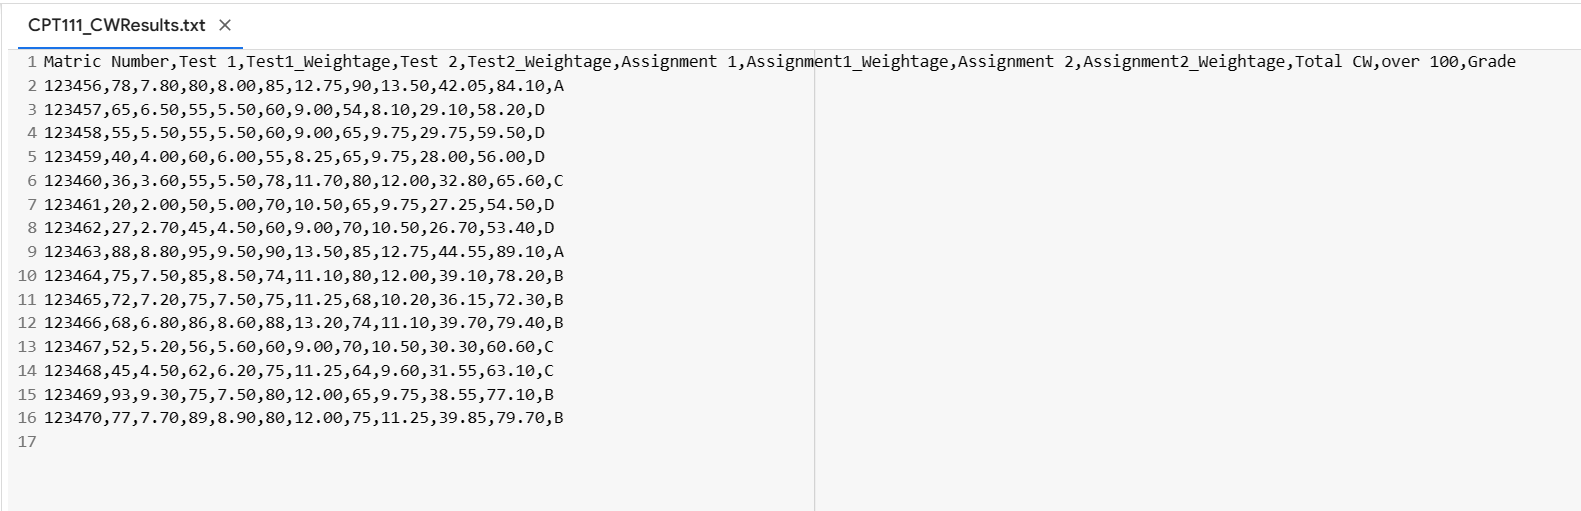)

#Case Run 2
Test for invalid total coursework marks and number of students


In [ ]:
%%shell
g++ coursework.cpp -o coursework.elf
./coursework.elf

                   Coursework Mark Calculator
---------------------------------------------------------------------
Enter Total Coursework Marks : -10
Invalid input for coursework marks. Please enter a valid coursework marks. 
Enter Total Coursework Marks : 50
Enter number of student: -20
Invalid input for number of student. Please enter a valid number of student. 
Enter number of student: -1
Invalid input for number of student. Please enter a valid number of student. 
Enter number of student: 15
Enter Percentage for Test 1: 10
Enter Percentage for Test 2: 10
Enter Percentage for Assignment 1: 15
Enter Percentage for Assignment 2: 15

Output file (CPT111_CWResults.txt) is created!


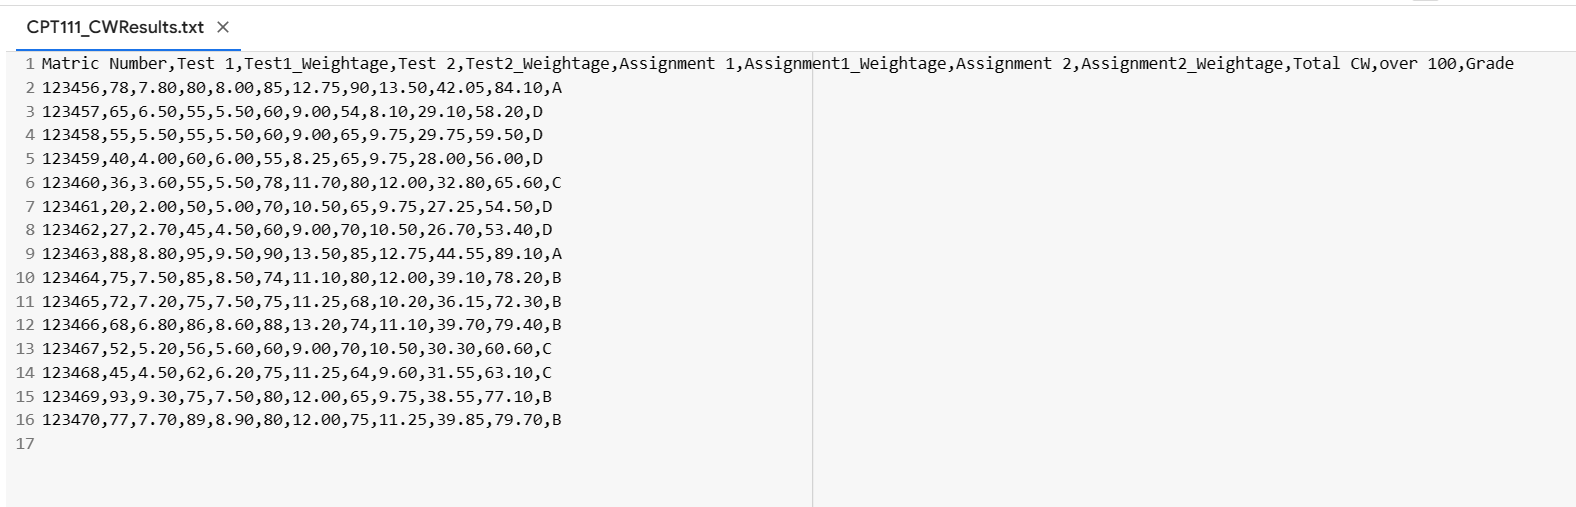

#Case Run 3
change total coursework mark


In [ ]:
%%shell
g++ coursework.cpp -o coursework.elf
./coursework.elf

                   Coursework Mark Calculator
---------------------------------------------------------------------
Enter Total Coursework Marks : 40
Enter number of student: 15
Enter Percentage for Test 1: 10
Enter Percentage for Test 2: 10
Enter Percentage for Assignment 1: 10
Enter Percentage for Assignment 2: 10

Output file (CPT111_CWResults.txt) is created!


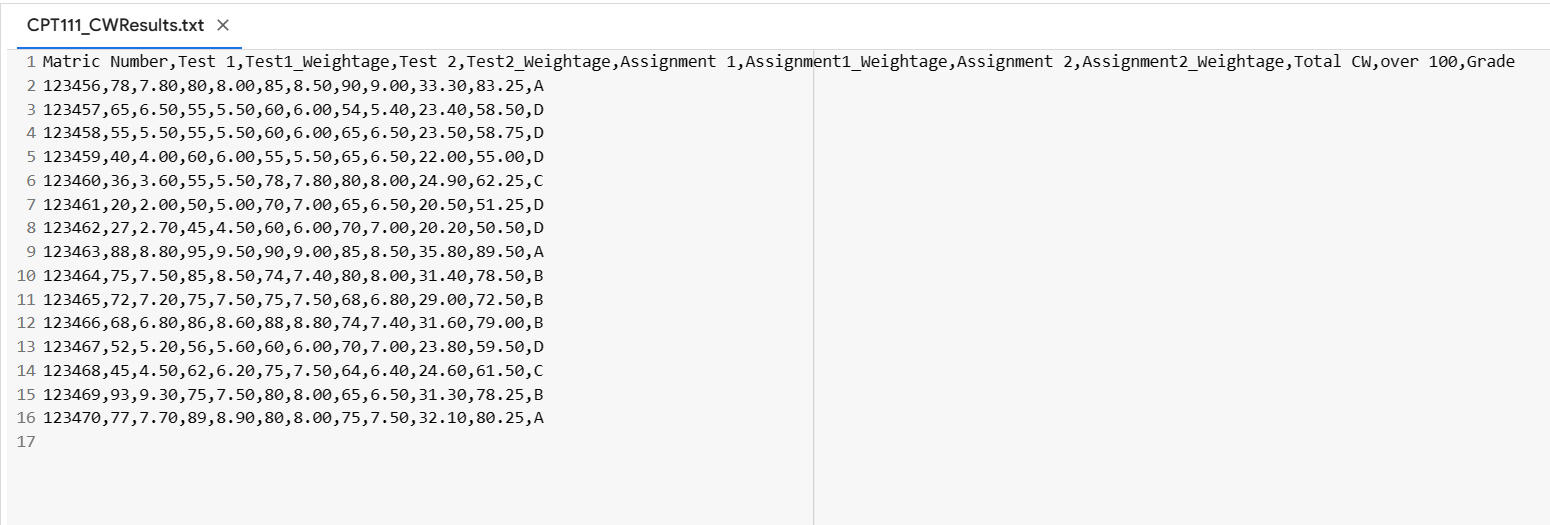

#Case Run 4
In this test run, the total coursework mark and the sum of the coursework marks are different. The program displays the final coursework marks based on the default total coursework mark, not the sum of the coursework marks.

In [ ]:
%%shell
g++ coursework.cpp -o coursework.elf
./coursework.elf

                   Coursework Mark Calculator
---------------------------------------------------------------------
Enter Total Coursework Marks : 40
Enter number of student: 15
Enter Percentage for Test 1: 10
Enter Percentage for Test 2: 10
Enter Percentage for Assignment 1: 15
Enter Percentage for Assignment 2: 15

Output file (CPT111_CWResults.txt) is created!


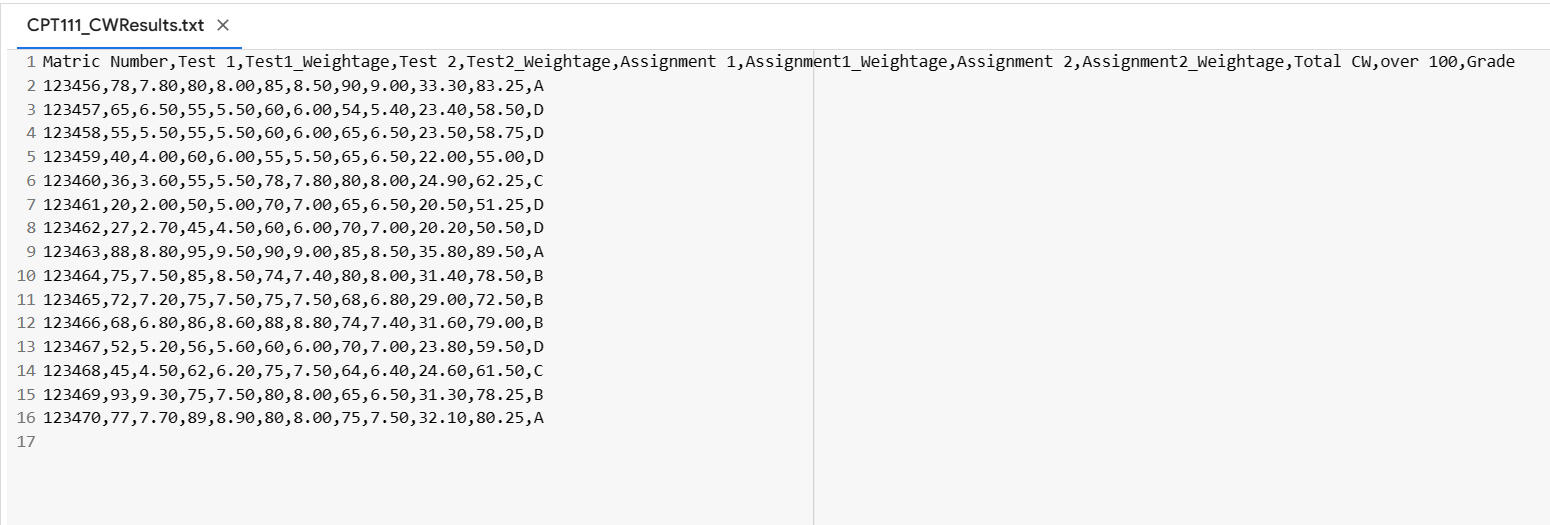

#Case Run 5
In this case run, the total coursework mark is 60 and the sum of the coursework percentages is 50.

In [ ]:
%%shell
g++ coursework.cpp -o coursework.elf
./coursework.elf

                   Coursework Mark Calculator
---------------------------------------------------------------------
Enter Total Coursework Marks : 60
Enter number of student: 15
Enter Percentage for Test 1: 10
Enter Percentage for Test 2: 10
Enter Percentage for Assignment 1: 15
Enter Percentage for Assignment 2: 15

Output file (CPT111_CWResults.txt) is created!


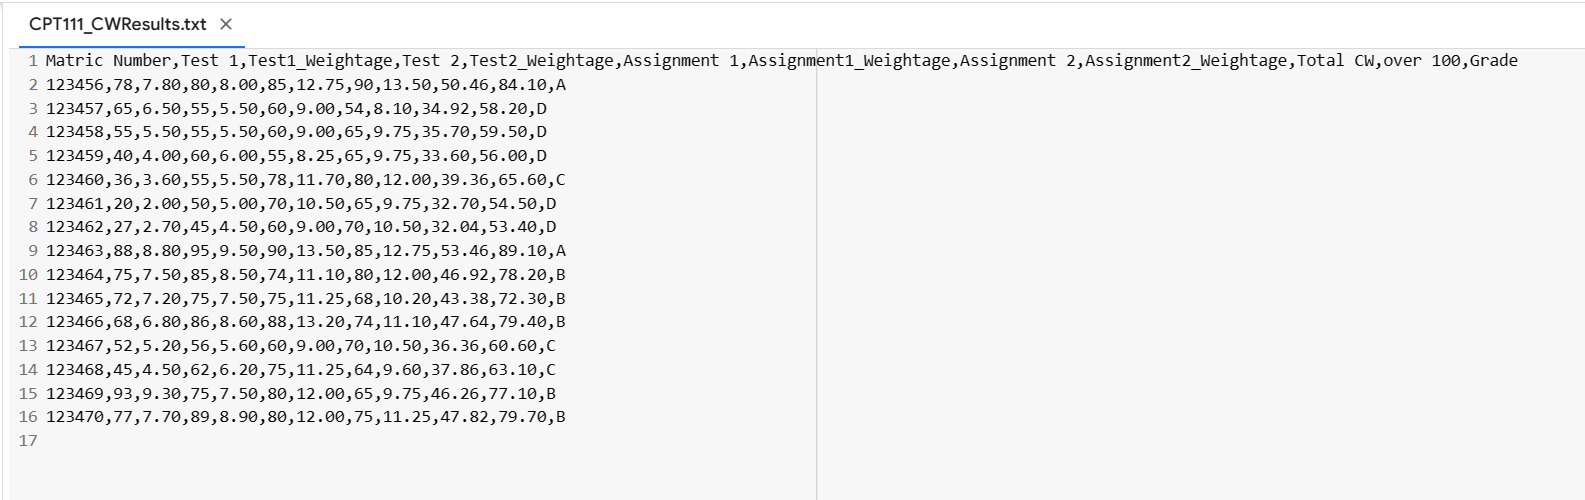